### Introduction
 Fake news has become one of the most serious problems of our generation. It has a huge impact on our online and offline conversations. Fake news still poses a clear and timely threat to western democracy and social stability. Social media is a huge pool of content and is the most watched part of all the content available to users. Politicians, television stations, newspaper websites, and even the public can post this information. The credibility of these posts is a serious problem in today's world, as many companies are taking steps to educate the public about the dangers of spreading false information. Need to be verified. Manual classification of messages is tedious, time consuming, and biased, so it is not possible to clearly determine the level of reliability of messages posted online.

### Steps for Project Implementation
* Data Preparation and Mining
* Exploratory Data Analysis
* Feature Engineering
* Modelling and Prediction
* Result
* Out of Sample Prediction

In [111]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [112]:
df = pd.read_csv(r"C:\Users\aleti\Downloads\satwik\news_articles.csv")

In [113]:
#get a peek into the data
df.tail(5)

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
2092,-NO AUTHOR-,2016-10-27T15:36:10.573+03:00,teens walk free after gangrape conviction,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/hillary_haunt...,bias,Real,good samaritan wearing indian headdress disarm...,NaN,1.0
2093,-NO AUTHOR-,2016-10-27T15:36:10.671+03:00,school named for munichmassacre mastermind,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/rambo_richard...,bias,Real,skype sex scam fortune built shame,NaN,1.0
2094,-NO AUTHOR-,2016-10-27T13:30:00.000+03:00,russia unveils satan missile,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/skype_sex_sca...,bs,Fake,cannabis aficionados develop thca crystalline ...,NaN,1.0
2095,-NO AUTHOR-,2016-10-27T15:58:41.935+03:00,check out hillarythemed haunted house,NaN,english,wnd.com,http://worldtruth.tv/wp-content/uploads/2016/1...,bs,Fake,title,NaN,0.0
2096,Eddy Lavine,2016-10-28T01:02:00.000+03:00,cannabis aficionados develop thca crystalline ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##  
We can see a lot of Nan and null values here.
## 

In [34]:
df.describe()

,hasImage
count,2094.000000
mean,0.776982
std,0.416370
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2096 non-null   object 
 1   published                2097 non-null   object 
 2   title                    2097 non-null   object 
 3   text                     2051 non-null   object 
 4   language                 2095 non-null   object 
 5   site_url                 2095 non-null   object 
 6   main_img_url             2095 non-null   object 
 7   type                     2095 non-null   object 
 8   label                    2095 non-null   object 
 9   title_without_stopwords  2093 non-null   object 
 10  text_without_stopwords   2045 non-null   object 
 11  hasImage                 2094 non-null   float64
dtypes: float64(1), object(11)
memory usage: 196.7+ KB


In [36]:
df.shape
#initial size of the dataset

(2097, 12)

### Data Preperation and Mining

In [37]:
#check for null values
df.isnull().sum()

author                      1
published                   0
title                       0
text                       46
language                    2
site_url                    2
main_img_url                2
type                        2
label                       2
title_without_stopwords     4
text_without_stopwords     52
hasImage                    3
dtype: int64

In [40]:
#drop the null values
df.dropna(inplace=True)

In [41]:
#Date Time split to see if any trend
timesplit = df['published'].str.split('T', 1, expand=True)
df['Time']=timesplit[1]
df['Date']=timesplit[0]

In [42]:
#Split the Month and Day Data
#Since all our data in from 2016, we might be able to see a trend if any, through the months
datesplit = df['Date'].str.split('-',n=-1, expand=True)
df['Year']=datesplit[0]
df['Month']=datesplit[1]
df['Day']=datesplit[2]

In [43]:
#drop some error producing rows
df.loc[df.Month == 'content/uploads/2014/04/jucundus']
df.drop(848, inplace=True)
df.loc[df.Month == 'content/uploads/2015/07/Earth']
df.drop(1838, inplace=True)

In [44]:
#Change the type for ease of plotting
df = df.astype({"Month": float, "Day":float})

In [45]:
df.tail(5)
#cleaner and transformed data

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage,Time,Date,Year,Month,Day
2042,Matt Barber,2016-10-27T03:04:50.327+03:00,why never trumpers must reconsider,prof canoes reek of genocide white privilege c...,english,wnd.com,No Image URL,bias,Real,trump vs clinton risk vs disaster,check hillarythemed haunted house anticlinton ...,0.0,03:04:50.327+03:00,2016-10-27,2016,10.0,27.0
2043,Jane Chastain,2016-10-27T03:04:50.704+03:00,election crossroads socialism or capitalism,teens walk free after gangrape conviction judg...,english,wnd.com,No Image URL,bias,Real,gingrich slutshames megyn kelly,good samaritan wearing indian headdress disarm...,1.0,03:04:50.704+03:00,2016-10-27,2016,10.0,27.0
2044,Michael Brown,2016-10-27T03:04:54.788+03:00,reasons ill vote for trump,school named for munichmassacre mastermind ter...,english,wnd.com,http://mobile.wnd.com/files/2011/12/leftfield3...,bias,Real,youtube bans clintons black son,skype sex scam fortune built shame moroccan bo...,1.0,03:04:54.788+03:00,2016-10-27,2016,10.0,27.0
2045,Ann Coulter,2016-10-27T03:05:01.989+03:00,our new country women and minorities hit hardest,wars and rumors of wars russia unveils satan ...,english,wnd.com,http://www.wnd.com/files/2016/10/danney-willll...,bias,Real,wikileaks bombshells hillary need know,posted eddie skyhigh potency may scare away cr...,1.0,03:05:01.989+03:00,2016-10-27,2016,10.0,27.0
2046,Larry Elder,2016-10-27T03:05:05.815+03:00,trump vs clinton a risk vs a disaster,check out hillarythemed haunted house anticlin...,english,wnd.com,http://www.wnd.com/files/2015/10/Hillary-Clint...,bias,Real,fascinated sex,billion even known keeping supposedly deleted ...,0.0,03:05:05.815+03:00,2016-10-27,2016,10.0,27.0


In [46]:
#Labelize the label column
#Create Dummies to represent Real and Fake by 1 and 0
dum_type=pd.get_dummies(df.label,drop_first=True,prefix="")
df=df.join(dum_type)
df.drop('label', axis=1, inplace=True)
df.rename(columns={'_Real':'Real'}, inplace=True)

### Exploratory data analysis (EDA)

Text(0.5, 1.0, 'Count of Real and Fake Data')

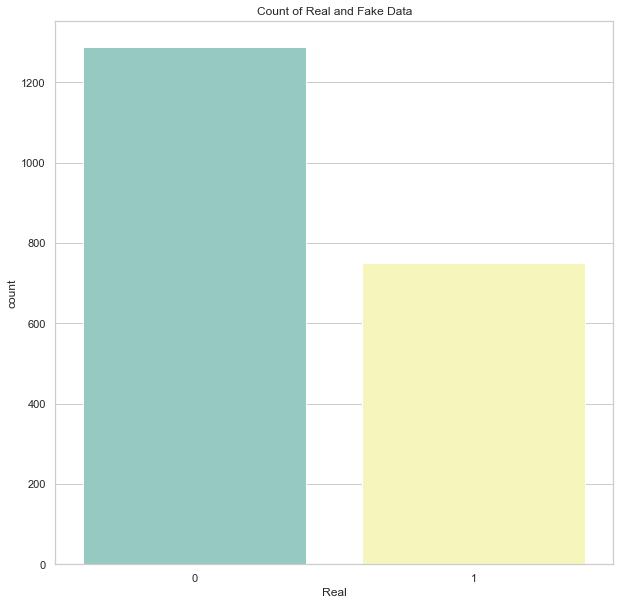

In [47]:
#plot to see Counts of Real and Fake data
sb.set_theme(style="whitegrid")
ax = sb.countplot(x="Real", data=df, palette='Set3')
ax.set_title("Count of Real and Fake Data")

Text(0.5, 1.0, 'Count of Languages of the news')

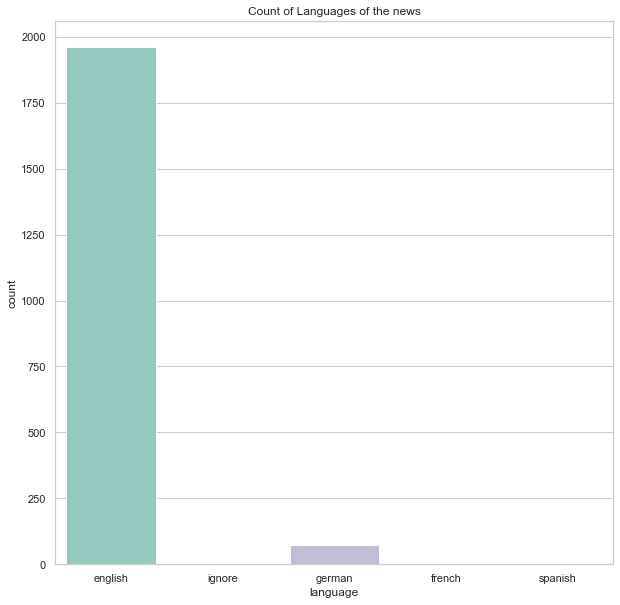

In [48]:
#plot to see Counts of Language data
sb.set_theme(style="whitegrid")
ax = sb.countplot(x="language", data=df, palette='Set3')
ax.set_title("Count of Languages of the news")

Text(0.5, 1.0, 'Count of Type of the news')

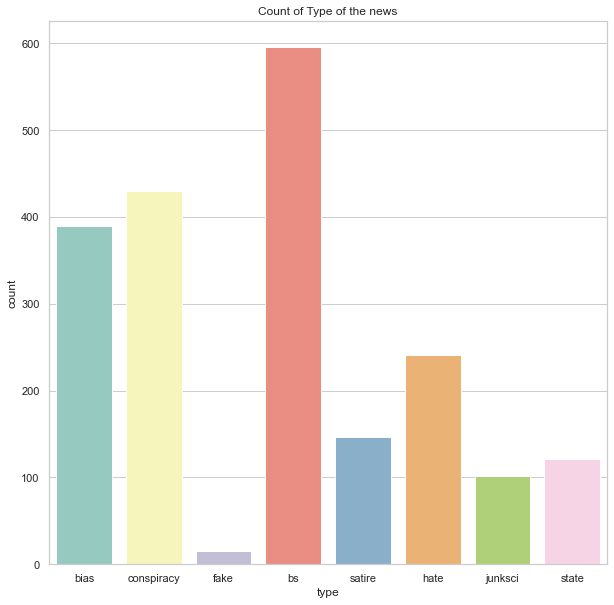

In [49]:
#plot to see Counts of type of news data
sb.set_theme(style="whitegrid")
ax = sb.countplot(x="type", data=df, palette='Set3')
ax.set_title("Count of Type of the news")

Text(0.5, 1.0, 'Count of news with Images')

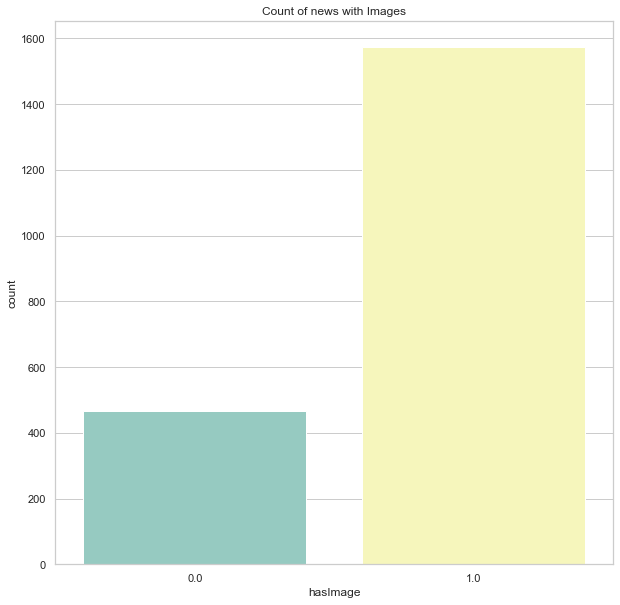

In [50]:
#plot to see Counts news data that have images or no
sb.set_theme(style="whitegrid")
ax = sb.countplot(x="hasImage", data=df, palette='Set3')
ax.set_title("Count of news with Images")

Text(0.5, 1.0, 'Top 10 Authors with count of news')

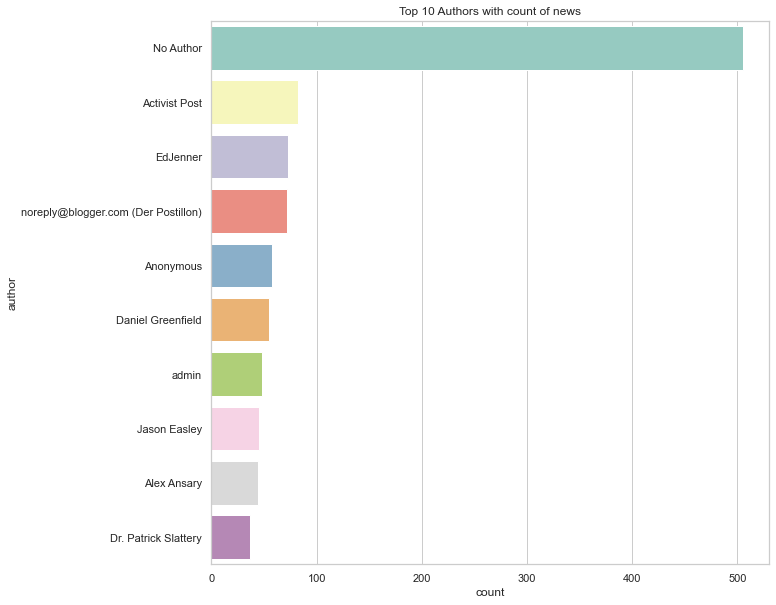

In [51]:
#plot to see top 10 Authors with most news articles
sb.set_theme(style="whitegrid")
ax = sb.countplot(y="author", data=df, palette='Set3', order =df.author.value_counts().iloc[:10].index)
ax.set_title("Top 10 Authors with count of news")

Text(0.5, 1.0, 'Top 10 Site URLS with count of news')

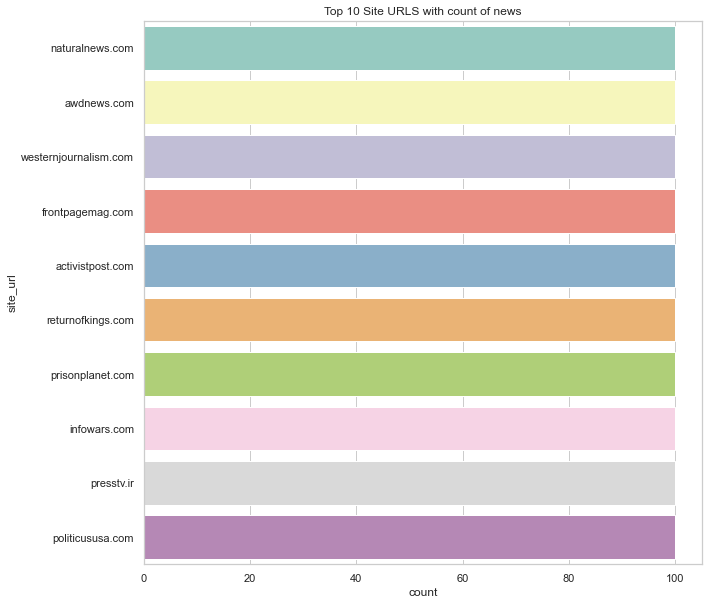

In [52]:
#plot to see top 10 Authors with most news urls
sb.set_theme(style="whitegrid")
ax = sb.countplot(y="site_url", data=df, palette='Set3', order =df.site_url.value_counts().iloc[:10].index)
ax.set_title("Top 10 Site URLS with count of news")

Text(0.5, 1.0, 'Months of published news')

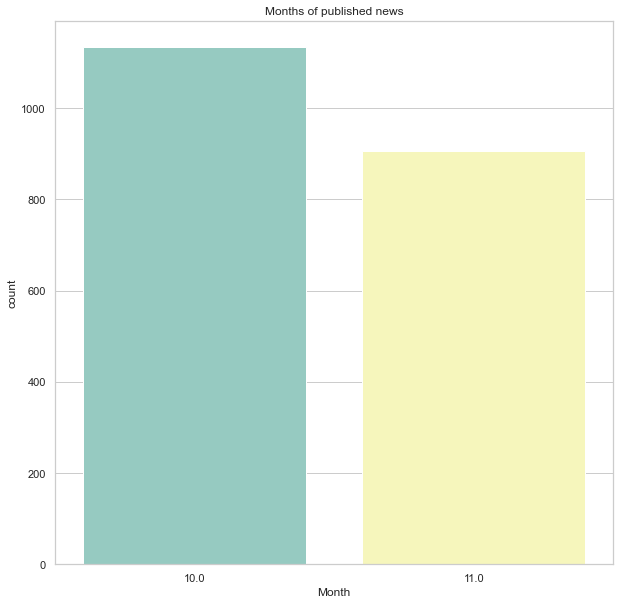

In [53]:
#plot to see Months of pblished news
sb.set_theme(style="whitegrid")
ax = sb.countplot(x="Month", data=df, palette='Set3')
ax.set_title("Months of published news")

Text(0.5, 1.0, 'Days of published news')

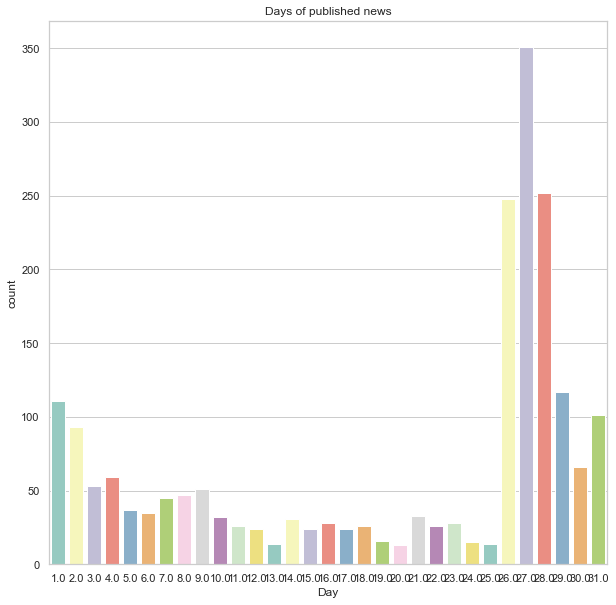

In [54]:
#plot to see Days of pblished news
sb.set_theme(style="whitegrid")
ax = sb.countplot(x="Day", data=df, palette='Set3')
sb.set(rc = {'figure.figsize':(10,10)})
ax.set_title("Days of published news")

### Findings from the EDA

1) There is no bias in the dataset because we have real and fake data <br>
2) Most of the news articles are in English so we will be using NLP and other techniques with English language in mind <br>
3) The type of news data is varied and that is good for classification. Also bs stands for Bullshit, all the articles with no type are classified into bs. <br>
4) Most of the news articles have an Image. <br>
5) Some of the most recurring site address and author names have been retrieved. We can use the occurance of the same sites to our advantage. <br>
6) We have a lot of articles towards the end of the month. <br>

The features that we can use for our model are author, title, text_without_stopwords and site urls. We have to explore these features in detail.

In [55]:
#Fake Authors
df.loc[df.Real == 0].author.value_counts().head(10) 

No Author                              329
Activist Post                           82
noreply@blogger.com (Der Postillon)     72
Anonymous                               58
admin                                   48
Alex Ansary                             44
Henry Wolff                             33
Corbett                                 27
tokyowashi (noreply@blogger.com)        20
Steve Watson                            16
Name: author, dtype: int64

In [56]:
#Fake URL sites
df.loc[df.Real == 0].site_url.value_counts().head(10)


activistpost.com      100
infowars.com          100
awdnews.com           100
naturalnews.com       100
clickhole.com         100
prisonplanet.com       99
abeldanger.net         82
der-postillon.com      72
ahtribune.com          67
abovetopsecret.com     53
Name: site_url, dtype: int64

In [57]:
#Real Authors
df.loc[df.Real == 1].author.value_counts().head(10)

No Author               176
EdJenner                 73
Daniel Greenfield        53
Jason Easley             45
Dr. Patrick Slattery     35
-NO AUTHOR-              22
Sarah Jones              16
Roosh Valizadeh          15
Hrafnkell Haraldsson     15
Fed Up                   12
Name: author, dtype: int64

In [58]:
#Real URL sites
df.loc[df.Real == 1].site_url.value_counts().head(10)

politicususa.com         100
presstv.ir                99
returnofkings.com         99
frontpagemag.com          99
westernjournalism.com     98
dailywire.com             81
wnd.com                   51
davidduke.com             41
100percentfedup.com       33
presstv.com               21
Name: site_url, dtype: int64

In [59]:
real = set(df[df['Real'] == 1]['site_url'].unique())
fake = set(df[df['Real'] == 0]['site_url'].unique())
print(f"{real & fake}")

{'westernjournalism.com', 'prisonplanet.com', 'frontpagemag.com', 'fromthetrenchesworldreport.com', 'returnofkings.com', 'washingtonsblog.com', 'davidduke.com', 'newstarget.com', 'presstv.ir'}


Here we can see that the Authors and Sites for real and fake news are clearly different. Meaning the same source is not producing real and fake news. There are some sites that produce both news but mostly they produce 1 type and some news articles can be of the other type. So with the main text, site urls and author names might also help in the prediction.

### Feature Engineering

In [60]:
#target is our column to be predicted and features are the columns that we will use for modelling
target = df.Real
features = df[['author','site_url','text_without_stopwords']]

In [61]:
features

,author,site_url,text_without_stopwords
0,Barracuda Brigade,100percentfedup.com,print pay back money plus interest entire fami...
1,reasoning with facts,100percentfedup.com,attorney general loretta lynch plead fifth bar...
2,Barracuda Brigade,100percentfedup.com,red state fox news sunday reported morning ant...
3,Fed Up,100percentfedup.com,email kayla mueller prisoner tortured isis cha...
4,Fed Up,100percentfedup.com,email healthcare reform make america great sin...
...,...,...,...
2042,Matt Barber,wnd.com,check hillarythemed haunted house anticlinton ...
2043,Jane Chastain,wnd.com,good samaritan wearing indian headdress disarm...
2044,Michael Brown,wnd.com,skype sex scam fortune built shame moroccan bo...
2045,Ann Coulter,wnd.com,posted eddie skyhigh potency may scare away cr...


In [62]:
#since all the feature columns are text data, we want to use text mining technique.
# we put all of them in the same column for ease of processing
features['combined_url_text'] = features["author"]+" "+features["site_url"] + " " + features["text_without_stopwords"]
features.drop(['author','site_url', 'text_without_stopwords'], axis = 1, inplace = True)
features=features.combined_url_text

C:\Users\aleti\AppData\Local\Temp\ipykernel_16420\366889726.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['combined_url_text'] = features["author"]+" "+features["site_url"] + " " + features["text_without_stopwords"]
C:\Users\aleti\AppData\Local\Temp\ipykernel_16420\366889726.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.drop(['author','site_url', 'text_without_stopwords'], axis = 1, inplace = True)


In [63]:
features

0       Barracuda Brigade 100percentfedup.com print pa...
1       reasoning with facts 100percentfedup.com attor...
2       Barracuda Brigade 100percentfedup.com red stat...
3       Fed Up 100percentfedup.com email kayla mueller...
4       Fed Up 100percentfedup.com email healthcare re...
                              ...                        
2042    Matt Barber wnd.com check hillarythemed haunte...
2043    Jane Chastain wnd.com good samaritan wearing i...
2044    Michael Brown wnd.com skype sex scam fortune b...
2045    Ann Coulter wnd.com posted eddie skyhigh poten...
2046    Larry Elder wnd.com billion even known keeping...
Name: combined_url_text, Length: 2040, dtype: object

We want to explore the test data. We want to see which words and topics are commom to the fake and real data. We want to see words that are completely unique to the fake and real data.<br>


### TFIDF Vectorizer
Term Frequency: This summarizes how often a given word appears within a document. Inverse Document Frequency: This downscales words that appear a lot across documents. TF-IDF are word frequency scores that try to highlight words that are more interesting.

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_words = TfidfVectorizer(stop_words='english')
X = vectorizer_words.fit_transform(features)

In [65]:
#trying to cluster the 2 data centres ie fake and real news
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 100, n_init = 1, verbose = True)
km.fit(X)

Initialization complete
Iteration 0, inertia 3932.3563520610023
Iteration 1, inertia 1989.0532487444366
Iteration 2, inertia 1984.3289332695604
Iteration 3, inertia 1982.993103322983
Iteration 4, inertia 1982.5768857936398
Iteration 5, inertia 1981.7284051861166
Iteration 6, inertia 1980.6675982566553
Iteration 7, inertia 1980.626443290827
Iteration 8, inertia 1980.6138880614676
Iteration 9, inertia 1980.601711843312
Iteration 10, inertia 1980.5993106459348
Iteration 11, inertia 1980.597033521295
Converged at iteration 11: strict convergence.


KMeans(max_iter=100, n_clusters=2, n_init=1, verbose=True)

In [66]:
import numpy as np
np.unique(km.labels_, return_counts=True)
features.reset_index(drop=True, inplace=True)

In [67]:
#Here we are collecting all the fake data into one cluster and all the real data into another.
#We are doing this as a pre step to the coming logic.
text={}
for i,cluster in enumerate(km.labels_):
    oneDocument = features[i]
    if cluster not in text.keys():
        text[cluster] = oneDocument
    else:
        text[cluster] += oneDocument

In [108]:
#importing NLTK libraries for NLP techiniques
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from string import punctuation
from heapq import nlargest
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aleti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [109]:
#here we are finding the keywords that appear in both the clusters and we do not want to include the stop words as those will be the most frequent
_stopwords = set(stopwords.words('english') + list(punctuation))

keywords = {}
counts={}
for cluster in range(2):
    word_sent = word_tokenize(text[cluster].lower())
    word_sent=[word for word in word_sent if word not in _stopwords]
    freq = FreqDist(word_sent)
    keywords[cluster] = nlargest(100, freq, key=freq.get)
    counts[cluster]=freq

In [97]:
keywords

{0: ['one',
  'people',
  'us',
  'said',
  'would',
  'also',
  'like',
  'time',
  'even',
  'new',
  'get',
  'world',
  'many',
  'could',
  'dont',
  'years',
  'first',
  'government',
  'state',
  'two',
  'women',
  'police',
  'make',
  'way',
  'well',
  'see',
  'der',
  'media',
  'know',
  'states',
  'right',
  'author',
  'may',
  'take',
  'american',
  'life',
  'day',
  'back',
  'men',
  'man',
  'good',
  'every',
  'much',
  'want',
  'since',
  'news',
  'made',
  'go',
  'think',
  'food',
  'say',
  'president',
  'another',
  'die',
  'october',
  'war',
  'still',
  'public',
  'going',
  'trump',
  'work',
  'year',
  'according',
  'last',
  'need',
  'never',
  'white',
  'political',
  'health',
  'around',
  'human',
  'united',
  'law',
  'used',
  'use',
  'country',
  'part',
  'im',
  'power',
  'system',
  'obama',
  'without',
  'water',
  'city',
  'times',
  'today',
  'military',
  'really',
  'things',
  'must',
  'help',
  'might',
  'israel',


In [98]:
#here we are finding keyword that are uniques to each cluster
set0 = set(keywords[0])
set1 = set(keywords[1])
unique0=set0-set1
unique1 =set1-set0

In [99]:
unique_keys={}
unique_keys[0]=nlargest(10, unique0, key=counts[0].get)
unique_keys[1]=nlargest(10, unique1, key=counts[1].get)

In [100]:
unique_keys

{0: ['police',
  'der',
  'author',
  'life',
  'men',
  'man',
  'good',
  'want',
  'food',
  'die'],
 1: ['clinton',
  'hillary',
  'election',
  'campaign',
  'donald',
  'fbi',
  'clintons',
  'email',
  'emails',
  'trumps']}

These are some of the words that are unique to each class. This gives us an idea about our news data.<br>

### Modelling and Prediction

In [101]:
#using the Vectorizer before doing the classification
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.20)

vectorizer = TfidfVectorizer(stop_words = 'english')
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)
tfidf_df = pd.DataFrame(tfidf_train.A, columns=vectorizer.get_feature_names())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [102]:
print(tfidf_train.shape)
print(y_train.shape)

(1632, 41826)
(1632,)


### Kneighbors classification:
#### kneighbors is a type of instance-based learning algorithm.
#### In this the given data points are identified and the classification is based on the class labels of the k neibhors.
#### The value of K can be choosen manually or by using cross-validation to find the optimal value 

In [103]:
#Kneighbors Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

KNb = KNeighborsClassifier(n_neighbors=5)
KNb.fit(tfidf_train, y_train)
y_pred = KNb.predict(tfidf_test)
KNscore=metrics.accuracy_score(y_test,y_pred)
print("Kneighbors Model accuracy: %0.4f" %KNscore)

Kneighbors Model accuracy: 0.7181


### Random Forest Classification:
#### It is a type of esemble-based learning algorithm.
#### In this algorithm it creates multiple decision trees and combines them to produce a more accurate classification.
#### The final classification is determined by taking a majority vote of the classification predicted by all the trees in the forest.

In [104]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=1000)
RF.fit(tfidf_train,y_train)
y_pred = RF.predict(tfidf_test)
RFscore = metrics.accuracy_score(y_test,y_pred)
print("Random Forest Model accuracy:  %0.4f" %RFscore)

Random Forest Model accuracy:  0.9387


### Adaboost Classification:
#### It is also another esemble-based algorithm.
#### This algoriyhm combines multiple weak classifiers to produce a strong classifier
#### The final classification is determined by weighted combination of the classification predicted by all weak classifiers.

In [105]:
#Adaboost Classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

Adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=5)
Adab.fit(tfidf_train, y_train)
y_pred = Adab.predict(tfidf_test)
ABscore = metrics.accuracy_score(y_test,y_pred)
print("Ada boost Classifier accuracy: %0.4f" %ABscore)

Ada boost Classifier accuracy: 0.9828


Among all the classifications, Adaboost is performing the best. We will choose AdaBoost Model.<br>

### Result

### Confusion Matrix:
#### A confusion matrix is a table used to evaluate the performance of a classification model on a set of text data where the true values are known .It is also known as error matrix.
#### The matrix compares the pedicted values of the model with the acutal or true values.
#### It also counts tje number of correct and incorrect predictions.

In [106]:
#creating a confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[252   6]
 [  1 149]]


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

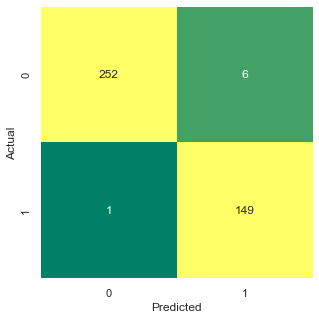

In [107]:
#creating a matrix using seaborn
import seaborn as sns

cm_df = pd.DataFrame(conf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
cm_df.columns.name = 'Predicted'
cm_df.index.name = 'Actual'
cm_df
plt.figure(figsize=(5,5))
sns.heatmap(cm_df, annot=True, vmax=20, square=True, cmap="summer",annot_kws={"size":12} ,cbar=False, fmt='g')

As we can see in the Confusion matrix, we have 252 records correctly predicted Fake and 149 records correctly predicted as Real.<br> 1 Fake news were predicted as Real and 6 Real news were predicted as Fake.

### Conclusion
 We have successfully build a model to classify news as Fake or Real. Adaboost Classfier gave us an accuracy upto 99% which is really great. This Model can be used best for political news as most of our training records contain political news. The same model can be further extended for all news types with a larger and more diverse dataset.

